In [49]:
import warnings
import numpy as np
import pandas as pd
from pandas_datareader import data as web
import matplotlib.pyplot as plt
from pandas import Series, DataFrame
from pylab import rcParams

%matplotlib inline
warnings.filterwarnings('ignore')
df = web.DataReader('FDS', data_source='stooq', start='01-01-2015')
df.head(3)

,Open,High,Low,Close,Volume
Date,,,,,
2021-07-28,344.56,346.11,342.20,345.35,106967
2021-07-27,342.88,345.91,341.42,344.09,93072
2021-07-26,344.68,346.23,340.71,342.75,125017


<BarContainer object of 9 artists>

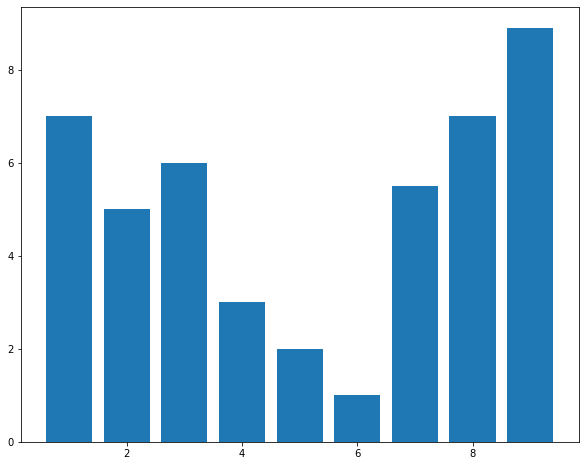

In [50]:
rcParams['figure.figsize']=10,8
x=range(1,10) # 1 to 9
y=[7, 5, 6, 3, 2,1,5.5,7,8.9]
plt.bar(x,y)

<BarContainer object of 9 artists>

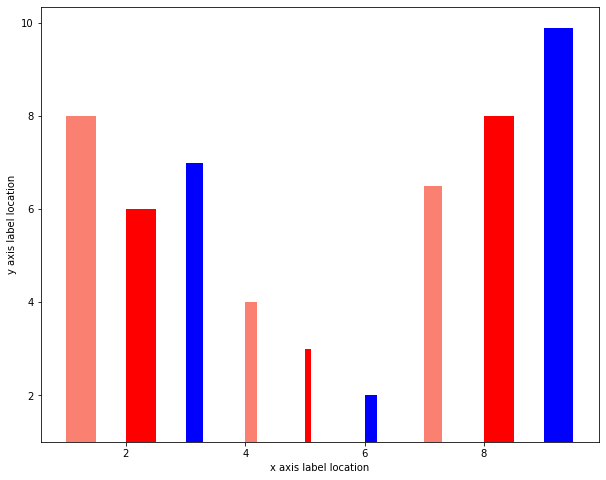

In [51]:
# change the width and colors etc
wide = [0.5, 0.5, 0.3, 0.2, 0.1, 0.2, 0.3,0.5, 0.5]
colour = ['salmon', 'red', 'blue']
plt.xlabel('x axis label location')
plt.ylabel('y axis label location')
plt.bar(x,y,width=wide, bottom=1, align='edge', color=colour)

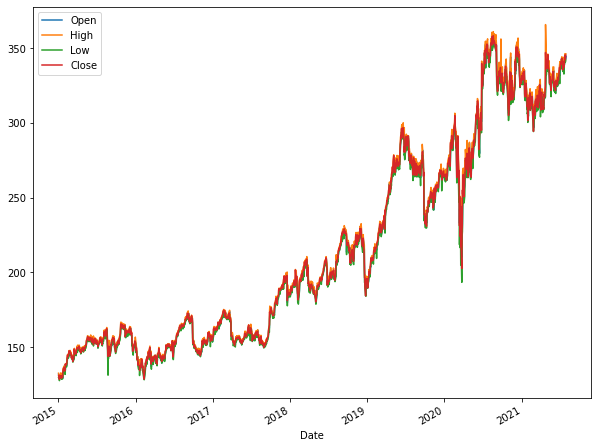

In [52]:
#lines
df_columes=['Open',	'High',	'Low',	'Close']
df[df_columes].plot()

Text(0, 0.5, 'y label here')

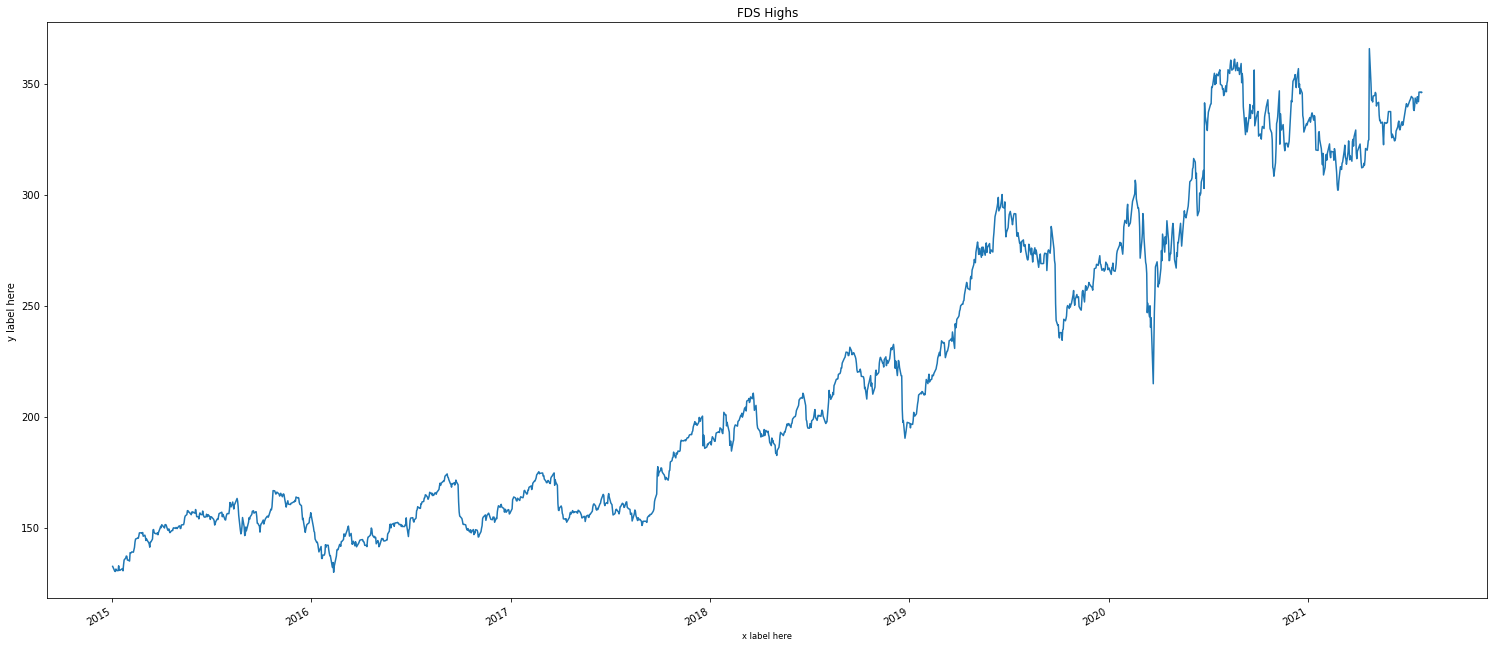

In [53]:
# using object oriented method
h = df.High
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,2,1])
h.plot()
ax.set_title('FDS Highs')
ax.set_xlabel('x label here', size='small')
ax.set_ylabel('y label here')

In [97]:
# annotate the low point from 2020-01-03 til now
lowest_point = h.loc[:'2020-01-03'].min()
# print(df[df['High']==lowest_point].index.values)
h[h==lowest_point].index

DatetimeIndex(['2020-03-23'], dtype='datetime64[ns]', name='Date', freq=None)

Text(2020-04-23, 194.83, 'Pandemic low point')

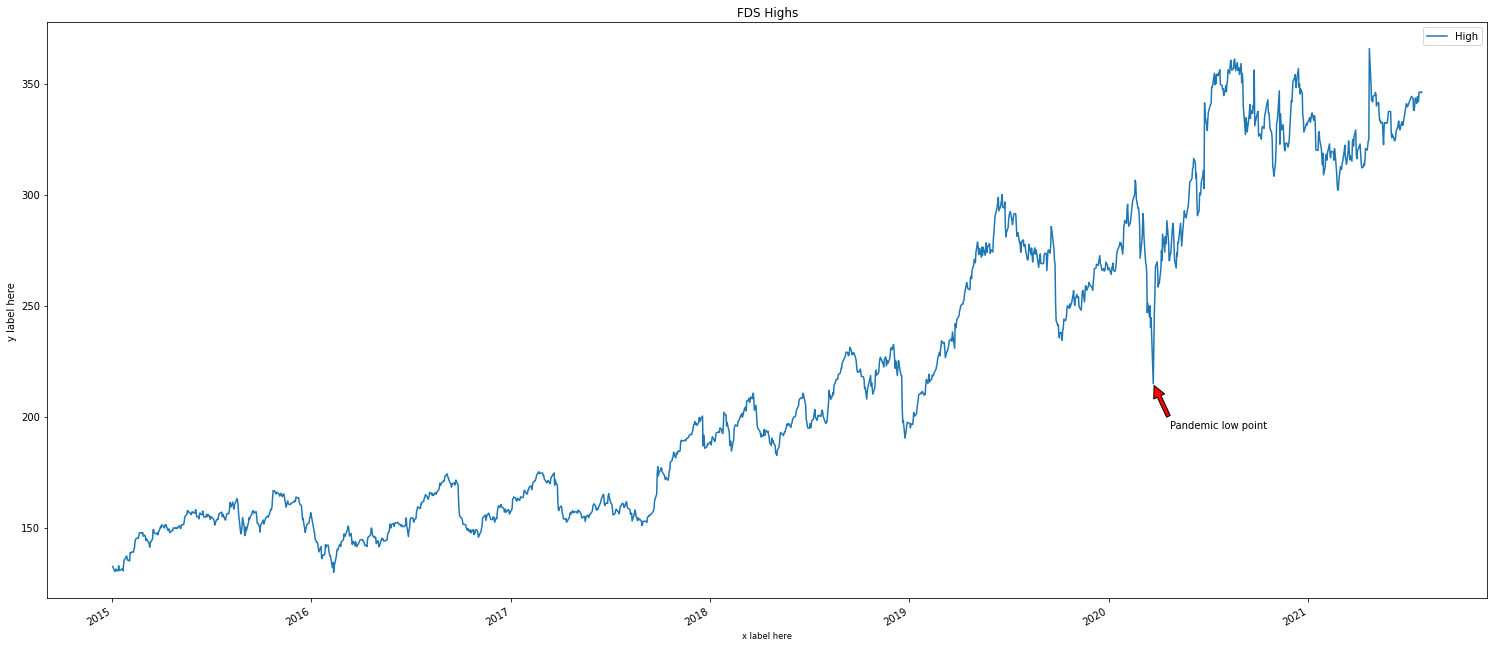

In [100]:
fig = plt.figure()
ax = fig.add_axes([0.1,0.1,2,1])
h.plot()
ax.set_title('FDS Highs')
ax.set_xlabel('x label here', size='small')
ax.set_ylabel('y label here')
ax.legend(loc='best')

ax.annotate('Pandemic low point',xy=('2020-03-23', lowest_point), xytext=('2020-04-23', lowest_point-20), arrowprops=dict(facecolor='red', shrink=0.05))

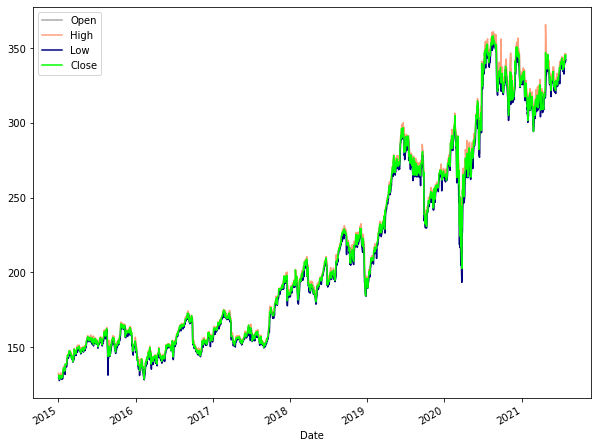

In [54]:
# change colors https://matplotlib.org/stable/gallery/color/named_colors.html
color_themes = ['darkgray', 'lightsalmon', 'navy', 'lime']
df[df_columes].plot(color=color_themes)

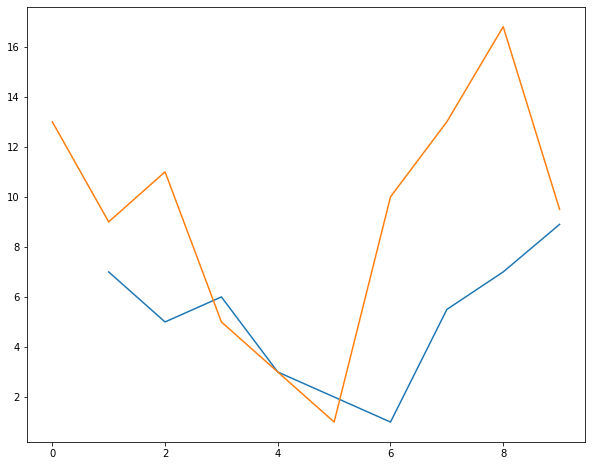

In [55]:
#add lines togather
x1 = range(0,10)
y1 = [2*w-1 for w in y]
y1.append(9.5)
y1
plt.plot(x,y)
plt.plot(x1,y1)

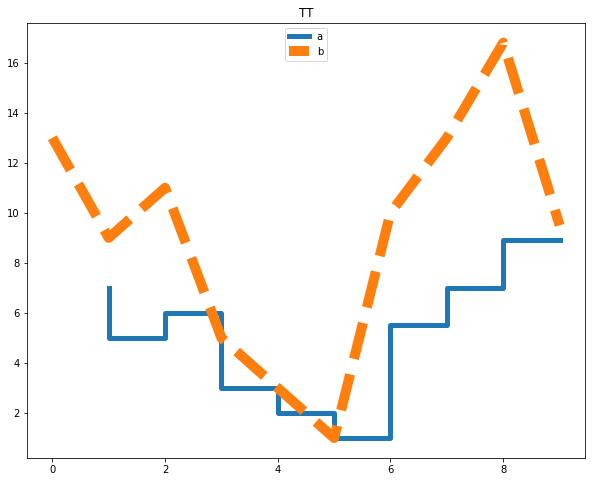

In [65]:
# marker and style and legend
leg = ('a', 'b')

plt.plot(x,y,ds='steps',lw=5) #lw: line width
plt.plot(x1,y1,ls='--', lw=10)
plt.legend(leg, loc='upper center') # legend must be after plot!
plt.title("TT")
plt.show()

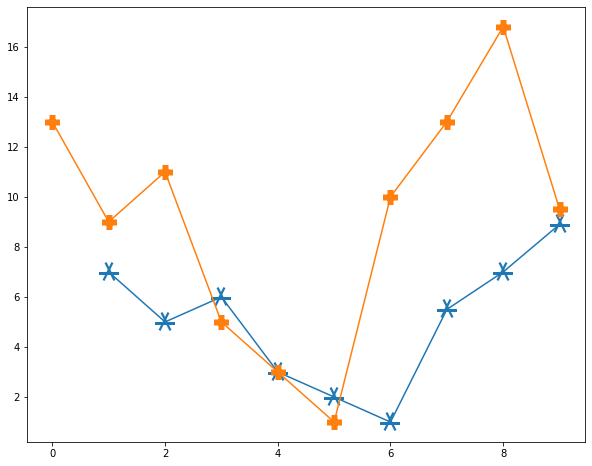

In [57]:
plt.plot(x,y,marker='1', mew=20) # https://matplotlib.org/stable/api/_as_gen/matplotlib.pyplot.plot.html
plt.plot(x1,y1,marker='+', mew=15)

([<matplotlib.patches.Wedge at 0x7f696ab9de90>,
 [Text(1.0973204551560924, 0.07673212297353954, ''),
  Text(1.0573878634819256, 0.30320109854868443, ''),
  Text(0.8899186801919163, 0.6465637962687656, ''),
  Text(0.48220822315582645, 0.9886734696151712, ''),
  Text(-0.19101304755469664, 1.083288519123076, ''),
  Text(-0.8899187407275838, 0.646563712948563, ''),
  Text(-1.0573878315457172, -0.3032012099234539, ''),
  Text(-0.266113932210899, -1.0673253370379874, ''),
  Text(0.8899188012632436, -0.6465636296283541, '')])

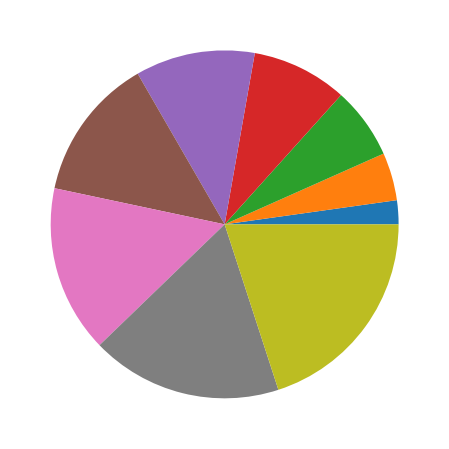

In [58]:
#pie
plt.pie(x)

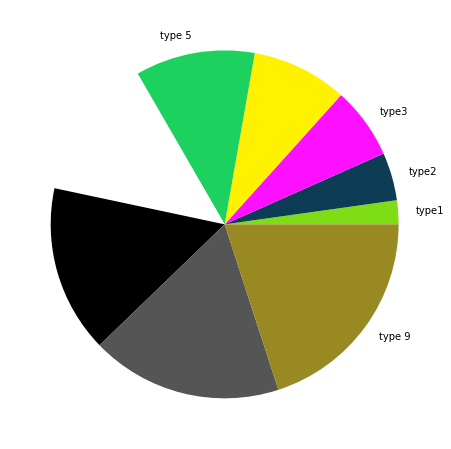

In [59]:
#change color and add label
color_themes = ['#7fdd15', '#0d3d54', '#fd0fff', '#fff100', '#1dd15f', '#ffffff', '#000000', '#555555', '#988923']
label = ['type1', 'type2','type3','' , 'type 5','' ,'','','type 9']
plt.pie(x, colors=color_themes, labels=label)
plt.show()

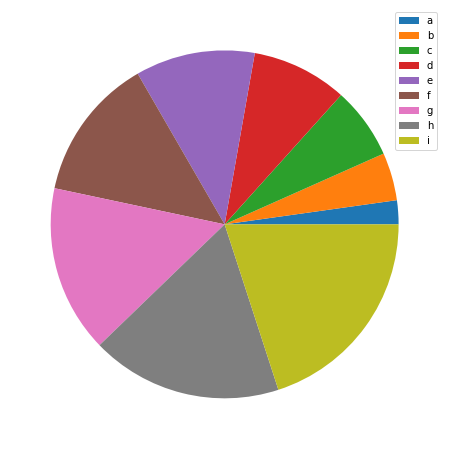

In [60]:
#use legend instead
label = ['a', 'b','c','d' , 'e','f' ,'g','h', 'i', 'j']
plt.pie(x)
plt.legend(label, loc='best')
plt.show()

In [61]:
import matplotlib.ticker as ticker 
import matplotlib.animation as animation
from IPython.display import HTML
from matplotlib import cm
import matplotlib as mpl

In [62]:
plt.rc('axes',axisbelow=True) #设置外观要求，即坐标轴置底
mpl.rcParams['animation.embed_limit'] = 2**128 #生成动画 动画默认的最大体积为20971520字节 调整生成的动画最大体积


In [63]:
fig =plt.figure(figsize=(12,8), dpi=200)
plt.subplots_adjust(top=1,bottom=0,left=0,right=0.9,hspace=0,wspace=0)

df_temp = df.reset_index()
df_temp

,Date,Open,High,Low,Close,Volume
0,2021-07-28,344.56,346.1100,342.20,345.35,106967
1,2021-07-27,342.88,345.9100,341.42,344.09,93072
2,2021-07-26,344.68,346.2300,340.71,342.75,125017
3,2021-07-23,342.44,346.1853,342.44,345.23,103690
4,2021-07-22,341.68,341.8700,339.34,340.83,145089
...,...,...,...,...,...,...
1649,2015-01-08,130.19,131.3700,130.16,131.01,189973
1650,2015-01-07,128.96,130.2800,128.47,129.45,247408
1651,2015-01-06,129.71,130.3200,127.59,128.43,375057
1652,2015-01-05,130.46,130.8100,128.76,129.12,194064


<Figure size 2400x1600 with 0 Axes>

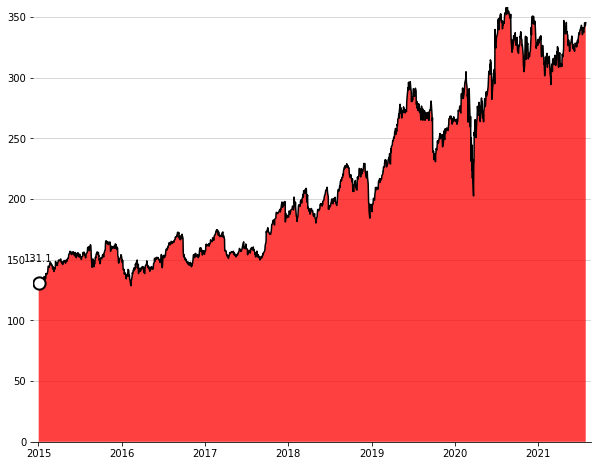

In [64]:
plt.fill_between(df_temp.Date.values, y1=df_temp.Close.values, y2=0,alpha=0.75, facecolor='r', linewidth=1,edgecolor ='none',zorder=1)
plt.plot(df_temp.Date, df_temp.Close, color='k',zorder=2)
plt.scatter(df_temp.Date.values[-1], df_temp.Close.values[-1], color='white',s=150,edgecolor ='k',linewidth=2,zorder=3)
plt.text(df_temp.Date.values[-1], df_temp.Close.values[-1]*1.18,s=np.round(df_temp.Close.values[-1],1),size=10,ha='center', va='top')
plt.ylim(0, df_temp.Close.max())
# plt.xticks(ticks=df_temp.Date.values[0:Span+1:30],labels=df_temp.Date.values[0:Span+1:30],rotation=0)
plt.margins(x=0.01)
ax = plt.gca()#获取边框
ax.spines['top'].set_color('none')    # 设置上‘脊梁’为无色
ax.spines['right'].set_color('none')  # 设置上‘脊梁’为无色
ax.spines['left'].set_color('none')   # 设置上‘脊梁’为无色
plt.grid(axis="y",c=(217/256,217/256,217/256),linewidth=1)
plt.show()